In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#MInst 데이터 다운!! 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


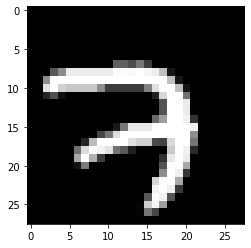

In [5]:
class Model:
    def __init__(self,sess,name):
        self.sess = sess
        self.name = name
        self._build_net()
        
    def _build_net(self):
        with tf.variable_scope(self.name):
            self.X = tf.placeholder(tf.float32,[None])
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#변수 선언
learning_rate_RMSProp = 0.02
learning_rate_GradientDescent = 0.5
num_epochs = 100
batch_size = 256
input_size = 784
hidden1_size = 128
hidden2_size = 64
display_step = 1
print('Learning started. It takes somtime')
for epoch in range(10):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs,Y:batch_ys}
        c,_,= sess.run([cost,optimizer],feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch : ', '%04d'% (epoch+1),'cost = ','{:9f}'.format(avg_cost))
print('Learning Finished')

correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuacy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print('Accuray :',sess.run(accuacy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))